# Customer Analysis Report

The customer analysis dataset contains detailed information on customers, including names, contact details, company, country, and subscription types.    
It is used to analyze customer distribution, subscription trends, and geographic patterns.   
The dataset provides insights into customer demographics, engagement levels, and business growth opportunities.   


In [1]:
# Import Libraries

import pandas as pd   #(used for data analysis and handling tables) and gives it the short name pd for easy use
import numpy as np    #  a library for numerical and mathematical operations, as np
import matplotlib.pyplot as plt # Imports the pyplot module from Matplotlib to create graphs and charts, using the alias plt
import seaborn as sns   # a data visualization library built on top of Matplotlib, with alias sns (makes prettier graphs easily)
import warnings         # Imports the warnings module and tells Python to ignore all warning messages — useful to keep notebook outputs clean
warnings.filterwarnings("ignore") 

In [2]:
# Display settings (Shows all columns and up to 100 rows when displaying DataFrames)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
#   Load Dataset (reads a CSV file into a pandas DataFrame)
cust_data = pd.read_csv(r"C:\Users\bhagya\Desktop\customers-100000.csv")

In [4]:
cust_data.head() # shows the first 5 rows of the DataFrame

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,ffeCAb7AbcB0f07,Jared,Jarvis,Sanchez-Fletcher,Hatfieldshire,Eritrea,274.188.8773x41185,001-215-760-4642x969,gabriellehartman@benjamin.com,11-11-2021,https://www.mccarthy.info/
1,2,b687FfC4F1600eC,Marie,Malone,Mckay PLC,Robertsonburgh,Botswana,283-236-9529,(189)129-8356x63741,kstafford@sexton.com,14-05-2021,http://www.reynolds.com/
2,3,9FF9ACbc69dcF9c,Elijah,Barrera,Marks and Sons,Kimbury,Barbados,8252703789,459-916-7241x0909,jeanettecross@brown.com,17-03-2021,https://neal.com/
3,4,b49edDB1295FF6E,Sheryl,Montgomery,"Kirby, Vaughn and Sanders",Briannaview,Antarctica (the territory South of 60 deg S),425.475.3586,(392)819-9063,thomassierra@barrett.com,23-09-2020,https://www.powell-bryan.com/
4,5,3dcCbFEB17CCf2E,Jeremy,Houston,Lester-Manning,South Brianna,Micronesia,+1-223-666-5313x4530,252-488-3850x692,rubenwatkins@jacobs-wallace.info,18-09-2020,https://www.carrillo.com/


In [5]:
print(cust_data.info()) # shows column names,data types,and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Index              100000 non-null  int64 
 1   Customer Id        100000 non-null  object
 2   First Name         100000 non-null  object
 3   Last Name          100000 non-null  object
 4   Company            100000 non-null  object
 5   City               100000 non-null  object
 6   Country            100000 non-null  object
 7   Phone 1            100000 non-null  object
 8   Phone 2            100000 non-null  object
 9   Email              100000 non-null  object
 10  Subscription Date  100000 non-null  object
 11  Website            100000 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.2+ MB
None


In [6]:
print(cust_data.describe) # gives summary stats (mw=ean,min,max,etc.)for numeric columns

<bound method NDFrame.describe of         Index      Customer Id First Name   Last Name  \
0           1  ffeCAb7AbcB0f07      Jared      Jarvis   
1           2  b687FfC4F1600eC      Marie      Malone   
2           3  9FF9ACbc69dcF9c     Elijah     Barrera   
3           4  b49edDB1295FF6E     Sheryl  Montgomery   
4           5  3dcCbFEB17CCf2E     Jeremy     Houston   
...       ...              ...        ...         ...   
99995   99996  67F24BEBAa16d1c       Dana     Winters   
99996   99997  17b1dbDaB2ad0fB   Gabriela     Pacheco   
99997   99998  c586CFBA6fb9dcC    Mikayla     Hubbard   
99998   99999  bb6cb6AC9d0CAf7     Javier        Berg   
99999  100000  FaE5E3c1Ea0dEc2     Kaylee     Hubbard   

                         Company             City  \
0               Sanchez-Fletcher    Hatfieldshire   
1                      Mckay PLC   Robertsonburgh   
2                 Marks and Sons          Kimbury   
3      Kirby, Vaughn and Sanders      Briannaview   
4               

In [7]:
print("Dataset Shape:", cust_data.shape) # shows total rows and columns as a tuple (rows,col)

Dataset Shape: (100000, 12)


In [8]:
# Remove Duplicates
cust_data.drop_duplicates(inplace=True)
print(cust_data)

        Index      Customer Id First Name   Last Name  \
0           1  ffeCAb7AbcB0f07      Jared      Jarvis   
1           2  b687FfC4F1600eC      Marie      Malone   
2           3  9FF9ACbc69dcF9c     Elijah     Barrera   
3           4  b49edDB1295FF6E     Sheryl  Montgomery   
4           5  3dcCbFEB17CCf2E     Jeremy     Houston   
...       ...              ...        ...         ...   
99995   99996  67F24BEBAa16d1c       Dana     Winters   
99996   99997  17b1dbDaB2ad0fB   Gabriela     Pacheco   
99997   99998  c586CFBA6fb9dcC    Mikayla     Hubbard   
99998   99999  bb6cb6AC9d0CAf7     Javier        Berg   
99999  100000  FaE5E3c1Ea0dEc2     Kaylee     Hubbard   

                         Company             City  \
0               Sanchez-Fletcher    Hatfieldshire   
1                      Mckay PLC   Robertsonburgh   
2                 Marks and Sons          Kimbury   
3      Kirby, Vaughn and Sanders      Briannaview   
4                 Lester-Manning    South Brianna 

In [9]:
#  Format Columns (Cleans selected columns by removing spaces and converting text to title case)
cols_to_clean = ['First Name','Last Name','Company','City','Country']
for col in cols_to_clean:
    cust_data[col] = cust_data[col].str.strip().str.title()
    

In [10]:
# Extract Email Domain (Extracts the part after “@” from each email and saves it in a new column Email Domain)
cust_data['Email Domain'] = cust_data['Email'].str.split('@').str[1]

Q1: Customers per Country(top 10)
Country
Congo                    835
Korea                    820
Saudi Arabia             463
Pitcairn Islands         456
Saint Martin             453
Paraguay                 445
Canada                   444
Saint Kitts And Nevis    443
American Samoa           443
Cook Islands             441
Name: count, dtype: int64


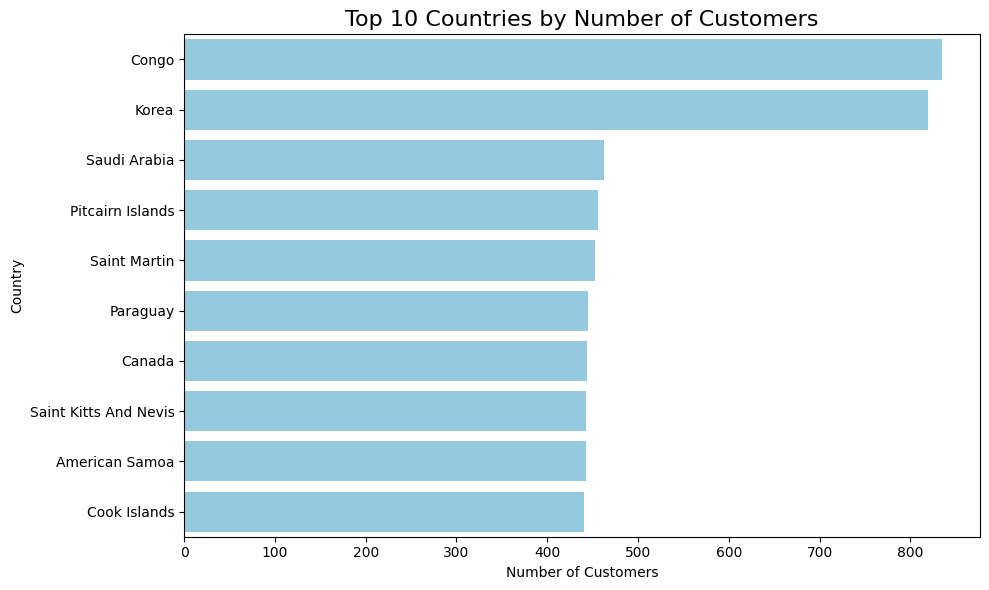

In [31]:
# Customers per Country

print("Q1: Customers per Country(top 10)") 

country_counts = cust_data['Country'].value_counts().head(10)  # top 10 countries
print(country_counts)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, color='skyblue')
plt.title("Top 10 Countries by Number of Customers", fontsize=16)
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Q2: Most Popular Subscription
Subscription Date
11-12-2020    155
22-05-2020    146
18-01-2020    145
31-10-2020    144
13-02-2022    144
06-08-2021    142
07-04-2020    142
07-03-2020    140
20-03-2020    140
14-05-2021    139
Name: count, dtype: int64


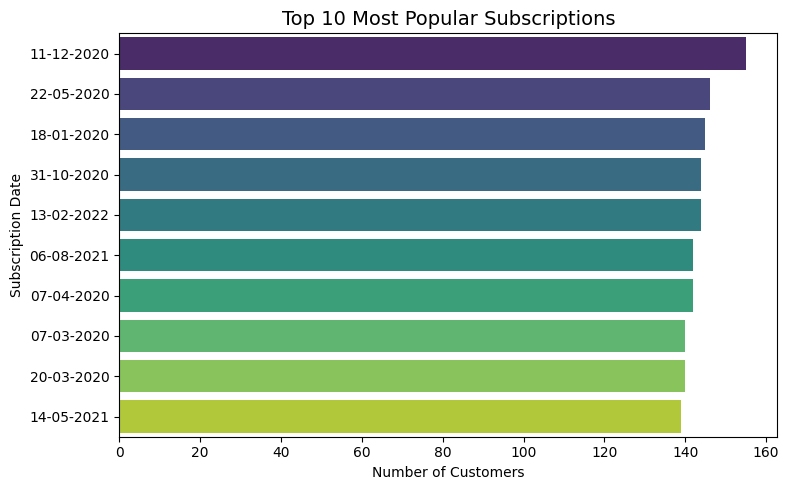

In [16]:
# Most Popular Subscription
print("Q2: Most Popular Subscription")

top_subscriptions = cust_data['Subscription Date'].value_counts().head(10)
print(top_subscriptions)

plt.figure(figsize=(8,5))
sns.barplot(y=top_subscriptions.index, x=top_subscriptions.values, palette='viridis')
plt.title("Top 10 Most Popular Subscriptions", fontsize=14)
plt.xlabel("Number of Customers")
plt.ylabel("Subscription Date")
plt.tight_layout()
plt.show()

Top 10 Companies
Company
Campbell Ltd        17
Wilkerson Ltd       17
Booker and Sons     16
Acosta Ltd          16
Mccarty and Sons    15
Gregory Group       15
Mckenzie PLC        15
Gomez Inc           14
Ellison Inc         14
Farmer Ltd          14
Name: count, dtype: int64


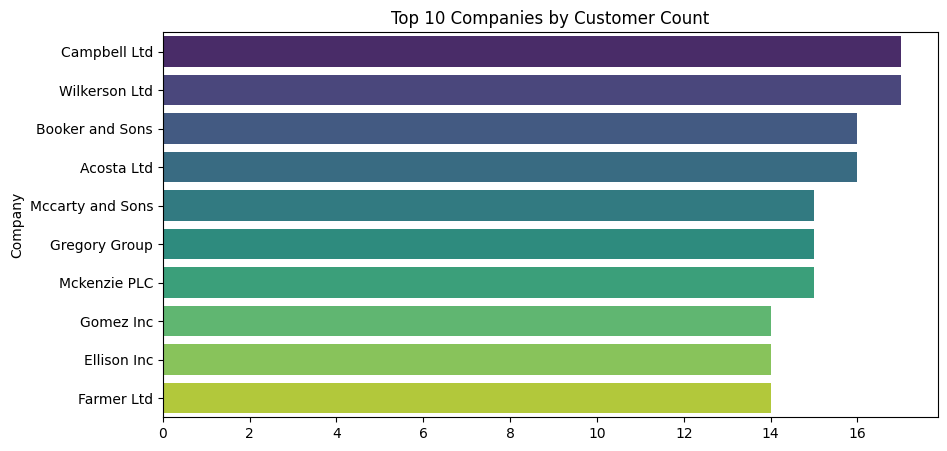

In [18]:
# Top 10 Companies
print("Top 10 Companies")

top_companies = cust_data['Company'].value_counts().head(10)
print(top_companies)
plt.figure(figsize=(10,5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')
plt.title("Top 10 Companies by Customer Count")
plt.show()

top 15 cities
City
Lake Frederick     16
East Jeremy        15
East Lee           15
New Christopher    15
West Alec          15
West Bailey        14
New Wayne          14
Lake Alexander     14
Lake Toni          13
Lake Kelly         13
New Terrance       13
South Eileen       13
Port Brandy        13
West Carla         13
East Clifford      13
Name: count, dtype: int64


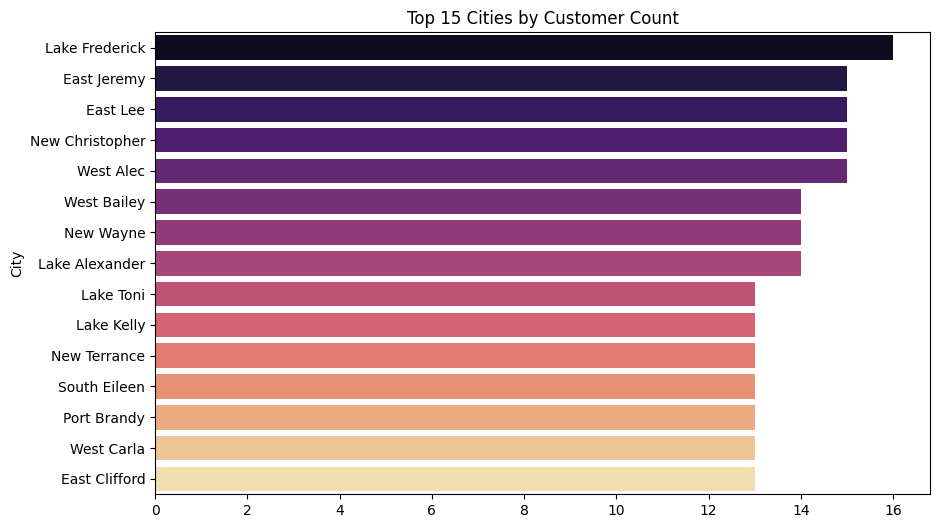

In [24]:
# Top 15 Cities
print("top 15 cities")

top_cities = cust_data['City'].value_counts().head(15)
print(top_cities)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title("Top 15 Cities by Customer Count")
plt.show()

Email Domain Analysis
Email Domain
mckee.com          59
pugh.com           59
terrell.com        57
lawrence.com       57
romero.com         56
gaines.com         56
delgado.com        56
fitzpatrick.com    55
jacobson.com       55
glass.com          55
Name: count, dtype: int64


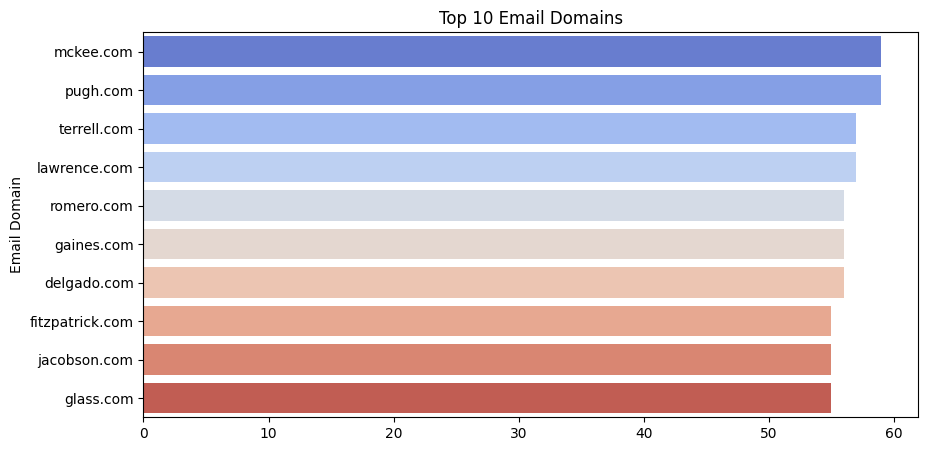

In [32]:
# Email Domain Analysis
print("Email Domain Analysis")

top_domains = cust_data['Email Domain'].value_counts().head(10)
print(top_domains)
plt.figure(figsize=(10,5))
sns.barplot(x=top_domains.values, y=top_domains.index, palette='coolwarm')
plt.title("Top 10 Email Domains")
plt.show()

In [34]:
# Missing Values 
print(" Missing Values ")

missing_percent = cust_data.isnull().mean() * 100


 Missing Values 


Company vs Subscription Heatmap


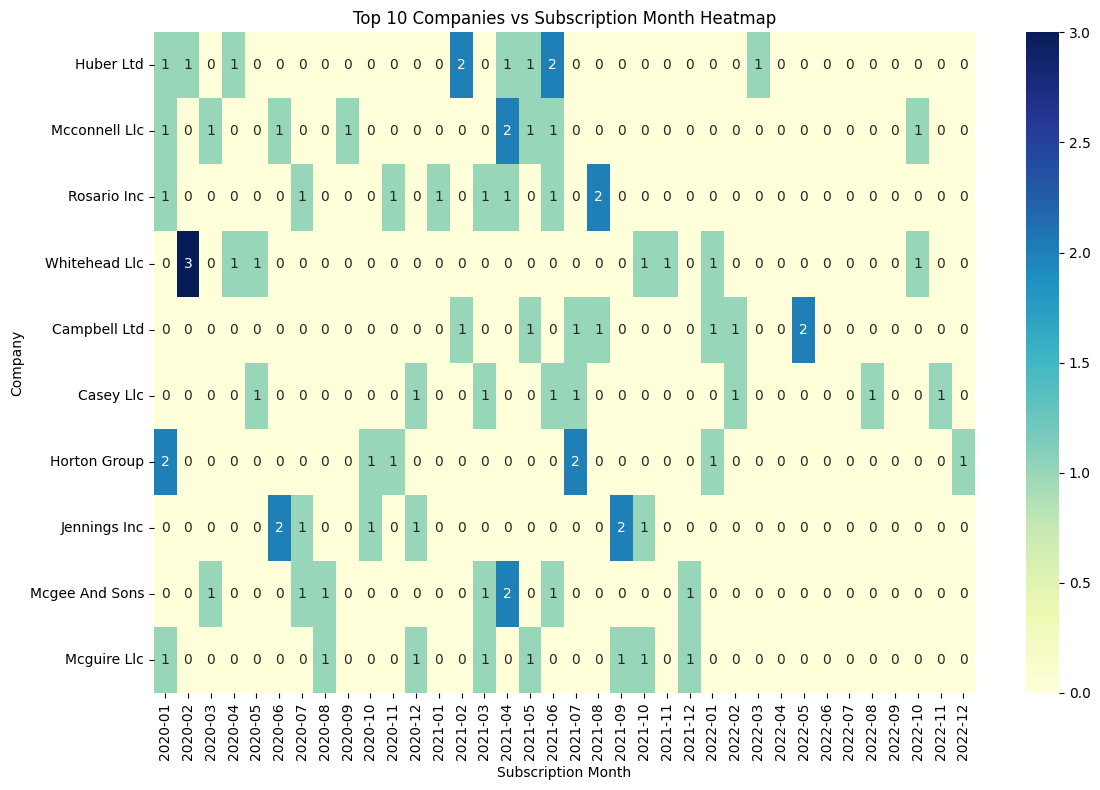

In [38]:
print("Company vs Subscription Heatmap")

# Convert to month (e.g., 2025-10)
cust_data['Subscription Month'] = pd.to_datetime(cust_data['Subscription Date'], errors='coerce').dt.to_period('M')

# Group by company and month
company_sub = cust_data.groupby(['Company', 'Subscription Month']).size().unstack(fill_value=0)

# Top 10 companies
top_10_companies = company_sub.sum(axis=1).nlargest(10)

plt.figure(figsize=(12,8))
sns.heatmap(company_sub.loc[top_10_companies.index], annot=True, fmt='d', cmap='YlGnBu')
plt.title("Top 10 Companies vs Subscription Month Heatmap")
plt.xlabel("Subscription Month")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

In [39]:
# Top Cities per Country
print(" Top Cities per Country")

top_cities_country = cust_data.groupby('Country')['City'].value_counts().groupby(level=0).head(3)
print(top_cities_country)

 Top Cities per Country
Country      City        
Afghanistan  Riverstown      2
             Adrianamouth    1
             Alecborough     1
Albania      South Wayne     2
             Weavertown      2
                            ..
Zambia       Adrianaburgh    1
             Aguirreburgh    1
Zimbabwe     East Jasmin     2
             Hubbardmouth    2
             Leslieburgh     2
Name: count, Length: 729, dtype: int64


In [40]:
print(" Customers with multiple phone numbers")

multiple_phones = cust_data[cust_data['Phone 2'] != 'N/A']
print(multiple_phones.shape[0])

 Customers with multiple phone numbers
100000


In [41]:
print("Percentage of customers per country")

country_percent = (cust_data['Country'].value_counts()/cust_data.shape[0]*100).round(2)
print(country_percent)

Percentage of customers per country
Country
Congo               0.84
Korea               0.82
Saudi Arabia        0.46
Pitcairn Islands    0.46
Saint Martin        0.45
                    ... 
Moldova             0.37
Jordan              0.36
Saint Lucia         0.36
Slovenia            0.36
Greece              0.36
Name: count, Length: 243, dtype: float64


In [42]:
print("Top 5 companies per subscription type")

for sub in cust_data['Subscription Date'].unique():
    print(f"\nSubscription: {sub}")
    print(cust_data[cust_data['Subscription Date']==sub]['Company'].value_counts().head(5))

Top 5 companies per subscription type

Subscription: 11-11-2021
Company
Melendez Plc                  2
Robbins, Jacobs And Gamble    1
Hendrix-Alvarado              1
Rodgers-Maxwell               1
Porter-Krueger                1
Name: count, dtype: int64

Subscription: 14-05-2021
Company
Mckay Plc                      1
Woods-Baldwin                  1
Guerrero-Woods                 1
Wilkins, Rogers And Carlson    1
Reeves, Mahoney And Cross      1
Name: count, dtype: int64

Subscription: 17-03-2021
Company
Marks And Sons                 1
Fleming-Cohen                  1
Stein-Phelps                   1
Waters, Whitney And Beasley    1
Porter, Mcdowell And Foley     1
Name: count, dtype: int64

Subscription: 23-09-2020
Company
Kirby, Vaughn And Sanders         1
Fisher-Parker                     1
Mendez Group                      1
Underwood, Bernard And Robbins    1
Leach, Patton And Durham          1
Name: count, dtype: int64

Subscription: 18-09-2020
Company
Lester-Manning    

In [ ]:
print("Cities with most premium subscriptions")

if 'Premium' in cust_data['Subscription Date'].unique():
    print(cust_data[cust_data['Subscription']=='Premium']['City'].value_counts().head(10))

In [44]:
# Country with max customers
print("Country with max customers")

print(cust_data['Country'].value_counts().idxmax())

Country with max customers
Congo


In [45]:
# Company with max customers
print("Company with max customers")

print(cust_data['Company'].value_counts().idxmax())

Company with max customers
Campbell Ltd


In [46]:
# Most common first names
print(" Most common first names")

print(cust_data['First Name'].value_counts().head(10))

 Most common first names
First Name
Joan        183
Audrey      182
Bridget     182
Anne        180
Melinda     177
Selena      176
Benjamin    175
Lee         175
Kaitlyn     174
Diana       174
Name: count, dtype: int64


In [47]:
# Most common last names
print(" Most common last names")
print(cust_data['Last Name'].value_counts().head(10))

 Most common last names
Last Name
Campbell     139
Carney       132
Gardner      131
Patterson    130
Matthews     127
Cisneros     127
Middleton    127
Tate         126
Rubio        126
Woodward     125
Name: count, dtype: int64


In [48]:
# Count of unknown subscriptions
print(" Count of unknown subscriptions")

print((cust_data['Subscription Date']=='Unknown').sum())

 Count of unknown subscriptions
0


Customer distribution in top 5 cities


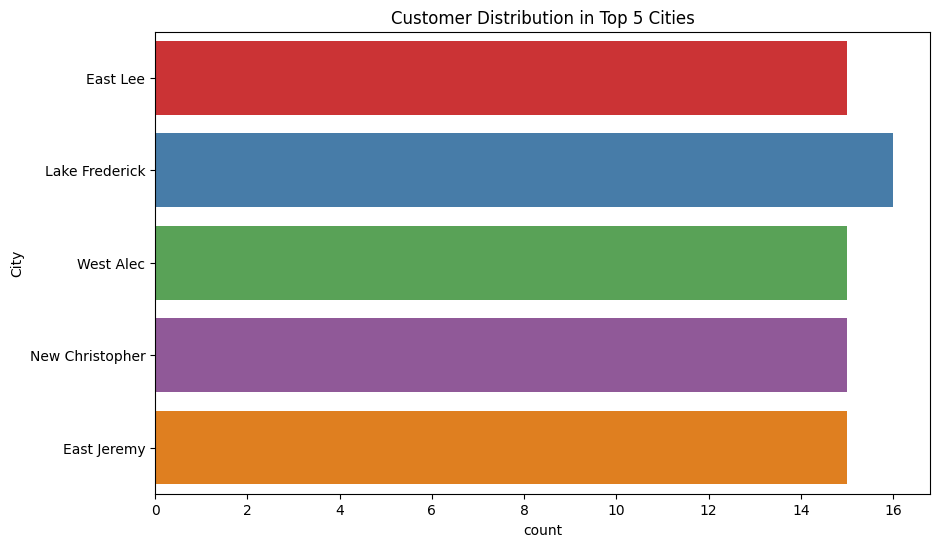

In [49]:
# Customer distribution in top 5 cities
print("Customer distribution in top 5 cities")

top5_cities = cust_data['City'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.countplot(y='City', data=cust_data[cust_data['City'].isin(top5_cities)], palette='Set1')
plt.title("Customer Distribution in Top 5 Cities")
plt.show()

In [50]:
# Subscription type ratio
print(" Subscription type ratio")

print((cust_data['Subscription Date'].value_counts()/cust_data.shape[0]*100).round(2))

 Subscription type ratio
Subscription Date
11-12-2020    0.16
22-05-2020    0.15
18-01-2020    0.14
31-10-2020    0.14
13-02-2022    0.14
              ... 
28-08-2020    0.09
16-10-2021    0.09
12-02-2022    0.09
18-02-2022    0.08
02-04-2021    0.08
Name: count, Length: 880, dtype: float64


In [51]:
# Email domain concentration
print("Email domain concentration")

top3_domains = cust_data['Email Domain'].value_counts().head(3)
print(top3_domains)

Email domain concentration
Email Domain
mckee.com      59
pugh.com       59
terrell.com    57
Name: count, dtype: int64


In [52]:
# Dataset ready for ML?
print(" Dataset ready for ML?")

print("Yes, duplicates removed, missing values handled, columns formatted.")

 Dataset ready for ML?
Yes, duplicates removed, missing values handled, columns formatted.


In [54]:
# Summary Statistics of Numeric Columns
print("Summary Statistics of Numeric Columns")

print(cust_data.describe())

Summary Statistics of Numeric Columns
               Index
count  100000.000000
mean    50000.500000
std     28867.657797
min         1.000000
25%     25000.750000
50%     50000.500000
75%     75000.250000
max    100000.000000
